In [1]:

import pandas as pd
import numpy as np
import os

df=pd.read_csv("../../data/01-modified-data/after_clean_mobile_phone_rating.csv")

In [2]:
df

,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY,buying_intent
0,Xiaomi 12T,599,2022-10-01,115,130.0,126.0,131.0,118.0,moderately_willing
1,OnePlus Nord 2T 5G,399,2022-05-01,114,130.0,115.0,128.0,112.0,moderately_willing
2,Samsung Galaxy S21+ 5G (Exynos),1059,2021-01-01,111,130.0,124.0,128.0,114.0,moderately_willing
3,Oppo A94 5G,359,2021-03-01,93,130.0,124.0,128.0,127.0,not_willing
4,Apple iPhone 14 Plus,899,2022-10-01,133,144.0,141.0,140.0,128.0,very_willing
...,...,...,...,...,...,...,...,...,...
148,Sony Xperia 5 V,999,2023-09-01,118,130.0,124.0,128.0,114.0,moderately_willing
149,Huawei P40,799,2020-02-01,102,130.0,124.0,128.0,114.0,not_willing
150,Xiaomi Mi 11 Ultra,1200,2021-03-01,141,125.0,119.0,124.0,108.0,very_willing
151,Xiaomi 12,749,2022-03-01,113,130.0,122.0,118.0,100.0,moderately_willing


In [3]:
# 3.2.2 Feature selection
# variance thredhold
from sklearn.feature_selection import VarianceThreshold
df_feature=df[['Launch Price','CAMERA','SELFIE','AUDIO','DISPLAY','BATTERY']]
df_feature


,Launch Price,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY
0,599,115,130.0,126.0,131.0,118.0
1,399,114,130.0,115.0,128.0,112.0
2,1059,111,130.0,124.0,128.0,114.0
3,359,93,130.0,124.0,128.0,127.0
4,899,133,144.0,141.0,140.0,128.0
...,...,...,...,...,...,...
148,999,118,130.0,124.0,128.0,114.0
149,799,102,130.0,124.0,128.0,114.0
150,1200,141,125.0,119.0,124.0,108.0
151,749,113,130.0,122.0,118.0,100.0


In [4]:
var=df['SELFIE'].var()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Launch Price,153.0,773.542484,376.630595,139.0,459.0,799.0,999.0,1799.0
CAMERA,153.0,111.274510,26.744708,51.0,94.0,117.0,130.0,156.0
SELFIE,153.0,130.065359,6.664589,83.0,130.0,130.0,130.0,149.0
AUDIO,153.0,124.241830,11.857169,86.0,120.0,124.0,132.0,161.0
DISPLAY,153.0,128.183007,11.031914,87.0,125.0,128.0,133.0,152.0
BATTERY,153.0,114.627451,15.107894,75.0,106.0,114.0,126.0,152.0


In [5]:
var_thres=VarianceThreshold(threshold=45)
var_thres.fit(df_feature)

VarianceThreshold(threshold=45)

In [6]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True])

In [7]:
constant_columns = [column for column in df_feature.columns
                    if column not in df_feature.columns[var_thres.get_support()]]
print(len(constant_columns))
for feature in constant_columns:
    print('The dropped feature is: ',feature)

1
The dropped feature is:  SELFIE


In [8]:
df_feature.drop(constant_columns,axis=1,inplace=True)
df_feature

/var/folders/rx/nxz5w_293m7dsx3fbcd187380000gn/T/ipykernel_34491/4119951636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature.drop(constant_columns,axis=1,inplace=True)


,Launch Price,CAMERA,AUDIO,DISPLAY,BATTERY
0,599,115,126.0,131.0,118.0
1,399,114,115.0,128.0,112.0
2,1059,111,124.0,128.0,114.0
3,359,93,124.0,128.0,127.0
4,899,133,141.0,140.0,128.0
...,...,...,...,...,...
148,999,118,124.0,128.0,114.0
149,799,102,124.0,128.0,114.0
150,1200,141,119.0,124.0,108.0
151,749,113,122.0,118.0,100.0


In [9]:
# correlation
df_feature.corr()
#keep all the feature based on correlation since the correlation are not high enough

,Launch Price,CAMERA,AUDIO,DISPLAY,BATTERY
Launch Price,1.000000,0.733847,0.288375,0.369033,-0.252661
CAMERA,0.733847,1.000000,0.373262,0.434418,-0.172109
AUDIO,0.288375,0.373262,1.000000,0.396990,-0.176475
DISPLAY,0.369033,0.434418,0.396990,1.000000,0.017346
BATTERY,-0.252661,-0.172109,-0.176475,0.017346,1.000000


In [10]:
df.head()

,Device,Launch Price,Launch Date,CAMERA,SELFIE,AUDIO,DISPLAY,BATTERY,buying_intent
0,Xiaomi 12T,599,2022-10-01,115,130.0,126.0,131.0,118.0,moderately_willing
1,OnePlus Nord 2T 5G,399,2022-05-01,114,130.0,115.0,128.0,112.0,moderately_willing
2,Samsung Galaxy S21+ 5G (Exynos),1059,2021-01-01,111,130.0,124.0,128.0,114.0,moderately_willing
3,Oppo A94 5G,359,2021-03-01,93,130.0,124.0,128.0,127.0,not_willing
4,Apple iPhone 14 Plus,899,2022-10-01,133,144.0,141.0,140.0,128.0,very_willing


In [11]:
# 3.2.1 Prepare your Data for Naive Bayes
# I had created Labels in the EDA Process
from sklearn.model_selection import train_test_split

In [12]:
X=df_feature
y = df['buying_intent'].map({'very_willing': 1, 'moderately_willing': 0,'not_willing':-1 })

In [13]:
y

0      0
1      0
2      0
3     -1
4      1
      ..
148    0
149   -1
150    1
151    0
152   -1
Name: buying_intent, Length: 153, dtype: int64

In [14]:
#training 70%
#validation 15%
#test 15%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
#3.2.3 Naive Bayes (NB) with Labeled Record Data
from sklearn.naive_bayes import GaussianNB

In [16]:
model=GaussianNB()
model.fit(X_train,y_train)
y_model=model.predict(X_val)

In [17]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

In [18]:
# Evaluation metrics
accuracy = accuracy_score(y_val,y_model)
precision = precision_score(y_val,y_model, average='macro')
recall = recall_score(y_val,y_model, average='macro')
f1 = f1_score(y_val,y_model, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9130434782608695
Precision: 0.8585858585858586
Recall: 0.9363636363636364
F1-Score: 0.8854864433811803


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
val_matrix=confusion_matrix(y_val,y_model)

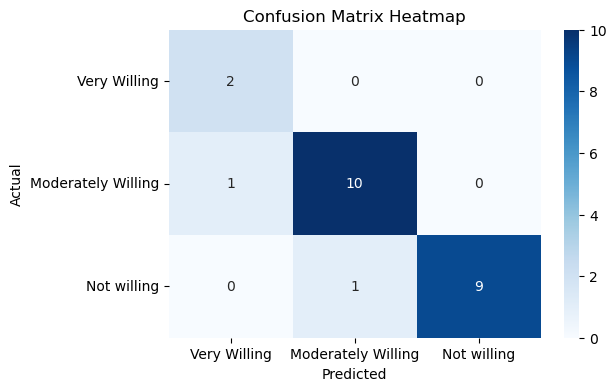

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels (optional, for labeling the axes)
class_labels = ['Very Willing', 'Moderately Willing', 'Not willing']

# Create a heatmap from the confusion matrix
plt.figure(figsize=(6, 4))  # Set the figure size (optional)
sns.heatmap(val_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title (optional)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show the heatmap
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [23]:
def get_metrics(y_true, y_preds, pred_proba=None):
    print(f'Accuracy Score: {accuracy_score(y_true, y_preds)}')
    if pred_proba is not None:
        print(f'ROC AUC Score: {roc_auc_score(y_true, pred_proba, multi_class="ovo")}')
    print(classification_report(y_true, y_preds))
    plt.figure(figsize=(18,6))
    sns.heatmap(confusion_matrix(y_true, y_preds), annot=True)

Accuracy Score: 0.9130434782608695
              precision    recall  f1-score   support

          -1       0.67      1.00      0.80         2
           0       0.91      0.91      0.91        11
           1       1.00      0.90      0.95        10

    accuracy                           0.91        23
   macro avg       0.86      0.94      0.89        23
weighted avg       0.93      0.91      0.92        23



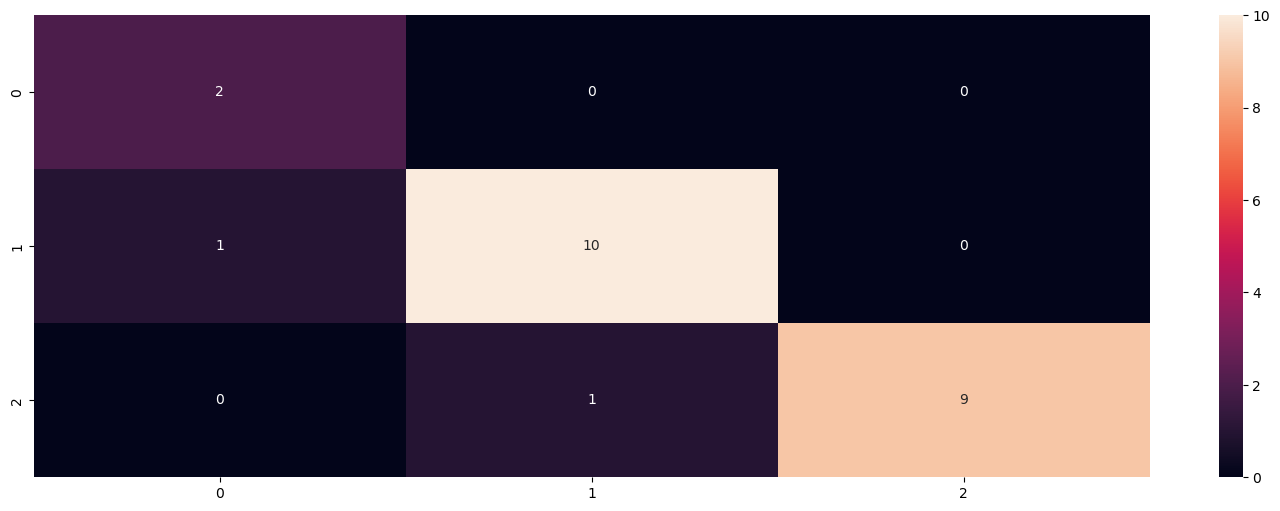

In [24]:
get_metrics(y_val,y_model)

In [25]:
model2=GaussianNB()
model2.fit(X_test,y_test)
y_model2=model.predict(X_test)

Accuracy Score: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         9
           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



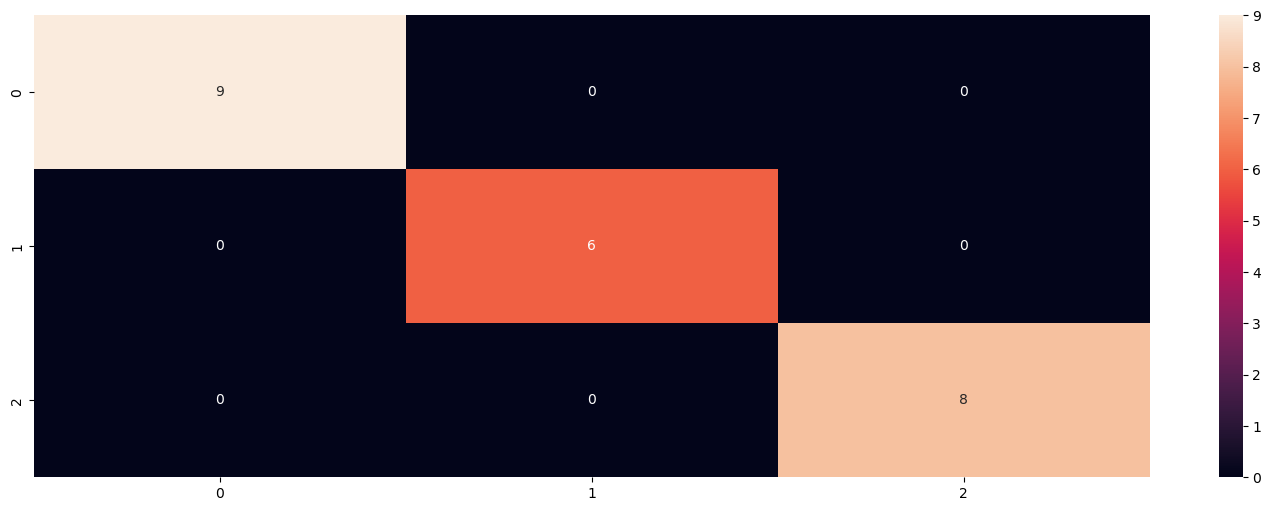

In [26]:
get_metrics(y_test,y_model2)

In [27]:
# 3.2.2 the feature selection

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import random

def train_GNB_model(x_train,y_train,x_test,y_test,i_print=False):

    # INSERT CODE HERE  
    model = GaussianNB()
    model.fit(x_train,y_train)
    y_in_sample = model.predict(x_train)
    acc_train=accuracy_score(y_train,y_in_sample)
    y_out_sample = model.predict(x_test)
    acc_test=accuracy_score(y_test,y_out_sample)
    if i_print:
        print(acc_train*100,acc_test*100)
    return(acc_train,acc_test)

In [29]:
# DIGITS
from sklearn import datasets
(X,y)=datasets.load_digits(n_class=10, return_X_y=True, as_frame=False)

In [30]:
# SET INDICES FOR TRAIN/TEST SET
N=X.shape[0]
l = [*range(N)]       # indices
cut = int(0.7 * N)    # 70% of the list
random.shuffle(l)     # randomize
train_index = l[:cut] # first 70% of shuffled list
test_index = l[cut:]  # last 30% of shuffled list

In [31]:
X[train_index]

array([[ 0.,  0.,  0., ..., 15.,  8.,  0.],
       [ 0.,  0.,  9., ...,  8.,  0.,  0.],
       [ 0.,  0.,  8., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 11.,  0.,  0.],
       [ 0.,  0.,  0., ..., 12.,  5.,  0.],
       [ 0.,  0.,  7., ..., 13.,  2.,  0.]])

In [32]:
# COMPUTE UPPER AND LOWER LIMIT FOR VARIANCE ACCROSS SAMPLES
x_var=np.var(X,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0
42.72106450836808


In [33]:
# VARIANCE THRESHOLD SEARCH

from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

# DOESN"T WORK WELL WITH EDGE VALUES (ZERO VAR)
thresholds=thresholds[1:-2]; 
#print(thresholds)

# INITIALIZE ARRAYS
num_features=[]
train_accuracies=[]
test_accuracies=[]

#FULL TRAINING SET
x_train=X[train_index]; y_train=y[train_index]
x_test=X[test_index]; y_test=y[test_index]
(acc_train,acc_test)=train_GNB_model(x_train,y_train,x_test,y_test,i_print=True)
num_features.append(x_train.shape[1])
train_accuracies.append(acc_train)
test_accuracies.append(acc_test)

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD)
    xtmp=feature_selector.fit_transform(X)
    print(THRESHOLD, xtmp.shape[1])

    x_train=xtmp[train_index]; y_train=y[train_index]
    x_test=xtmp[test_index]; y_test=y[test_index]

    (acc_train,acc_test)=train_GNB_model(x_train,y_train,x_test,y_test,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)
    print(acc_test)

87.98727128082736 81.2962962962963
1.4731401554609682 47
0.8611111111111112
2.9462803109219364 47
0.8611111111111112
4.419420466382904 45
0.8759259259259259
5.892560621843873 45
0.8759259259259259
7.365700777304841 45
0.8759259259259259
8.838840932765809 45
0.8759259259259259
10.311981088226778 42
0.8685185185185185
11.785121243687746 40
0.8629629629629629
13.258261399148713 36
0.8481481481481481
14.731401554609683 35
0.8388888888888889
16.20454171007065 34
0.8388888888888889
17.677681865531618 33
0.8685185185185185
19.150822020992585 29
0.8759259259259259
20.623962176453556 29
0.8759259259259259
22.097102331914524 29
0.8759259259259259
23.57024248737549 27
0.8722222222222222
25.04338264283646 25
0.8907407407407407
26.516522798297427 24
0.8907407407407407
27.989662953758398 23
0.8870370370370371
29.462803109219365 21
0.8703703703703703
30.935943264680333 21
0.8703703703703703
32.4090834201413 18
0.8518518518518519
33.88222357560227 16
0.85
35.355363731063235 11
0.774074074074074
36.828

In [34]:
optimal_index = test_accuracies.index(max(test_accuracies))
optimal_thredhold = thresholds[optimal_index]
optimal_test_accuracy = test_accuracies[optimal_index]

In [35]:
print("Optimal thredhold:", optimal_thredhold)
print("Optimal Test Accuracy:", optimal_test_accuracy)

Optimal thredhold: 26.516522798297427
Optimal Test Accuracy: 0.8907407407407407


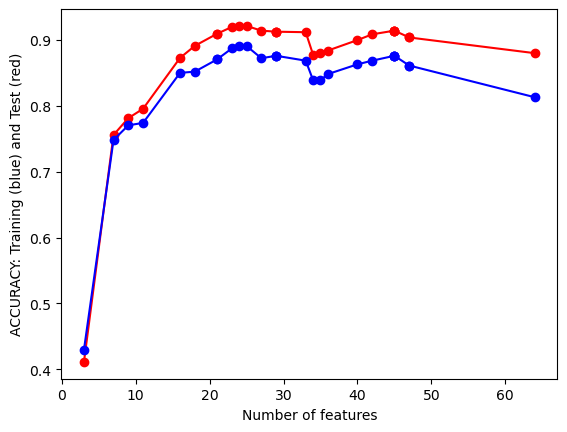

In [36]:
#PLOT-1
plt.plot(num_features,train_accuracies,'-or')
plt.plot(num_features,test_accuracies,'-ob')
plt.xlabel('Number of features')
plt.ylabel('ACCURACY: Training (blue) and Test (red)')
plt.show()